In [1]:
# only adjust settings in this cell
state = 'NE'
k = 3                 # the state has this number of districts
enumeration_limit = 10

In [2]:
filepath = 'C:\\districting-data-2020-reprojection\\'
filename = state + '_county.json'

from read import read_graph_from_json
G = read_graph_from_json( state, filepath + filename) 
k = G._k

In [3]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / k
print(f"When k = {k}, ideal_population = {round(ideal_population,2)}.")

When k = 3, ideal_population = 653834.67.


In [4]:
from optimization import iterative_refinement
from math import ceil, floor
import time

deviation = 1/2
max_deviation = 0.01 * ideal_population
plans = list()

while True:

    print("*****************************************")
    print(f"Trying deviation = {deviation}.")
    print("*****************************************")
    
    L = ceil( ideal_population - deviation )
    U = floor( ideal_population + deviation )

    start_time = time.perf_counter()
    plans += iterative_refinement(G, L, U, k, enumeration_limit=enumeration_limit, verbose=False)
    print("Total time =",round(time.perf_counter() - start_time,2))

    if deviation == max_deviation:
        break
    
    deviation *= 2
    deviation = min( deviation, max_deviation )
       

*****************************************
Trying deviation = 0.5.
*****************************************
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
Total time = 0.02
*****************************************
Trying deviation = 1.0.
*****************************************
Total time = 610.47
*****************************************
Trying deviation = 2.0.
*****************************************
Total time = 291.01
*****************************************
Trying deviation = 4.0.
*****************************************
Total time = 164.12
*****************************************
Trying deviation = 8.0.
*****************************************
Total time = 168.25
*****************************************
Trying deviation = 16.0.
*****************************************
Total time = 162.57
*****************************************
Trying deviation = 32.0.
*****************************************
Total time = 99.07
**************

***************************************
obj_type = cut_edges
***************************************
Pareto front objective values: [[0.6666666666278616, 158], [1.3333333333721384, 148], [4.333333333372138, 130], [7.666666666627862, 120], [7.666666666627862, 120], [8.333333333372138, 114], [8.333333333372138, 114], [9.666666666627862, 102], [13.333333333372138, 100], [17.33333333337214, 92], [48.33333333337214, 90], [67.33333333337214, 86], [123.66666666662786, 84], [151.33333333337214, 68], [151.33333333337214, 68], [151.33333333337214, 68], [179.66666666662786, 64], [185.33333333337214, 56], [187.66666666662786, 50], [492.66666666662786, 48], [619.3333333333721, 46], [690.6666666666279, 44], [694.6666666666279, 36], [2907.666666666628, 34], [4554.666666666628, 30]]


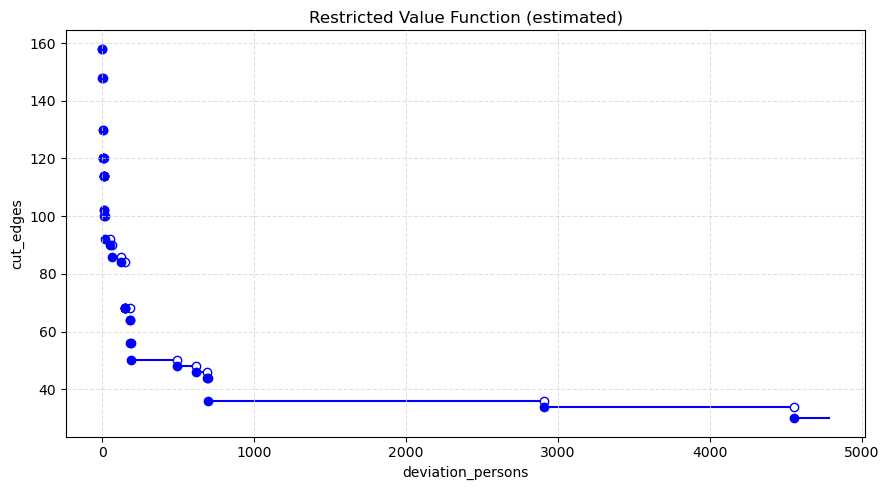

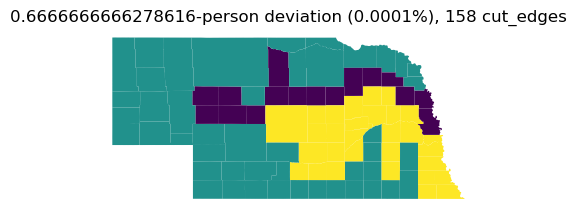

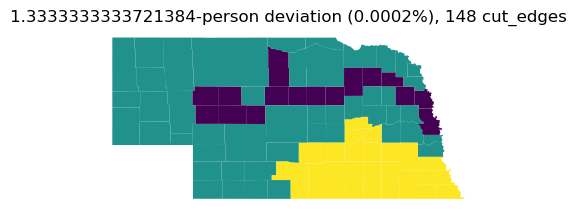

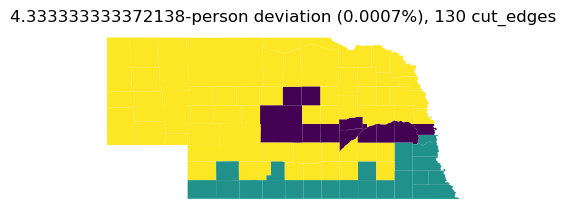

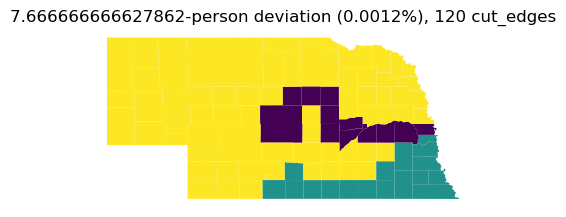

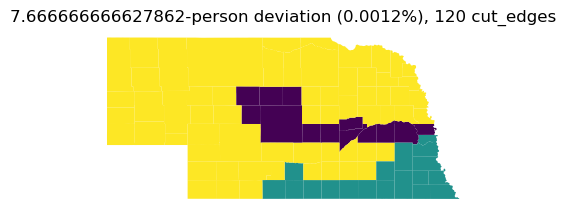

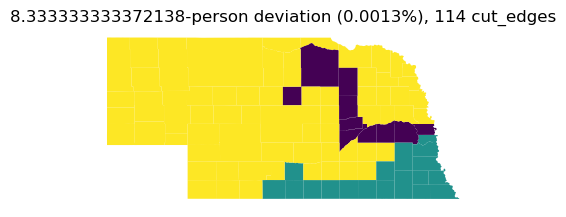

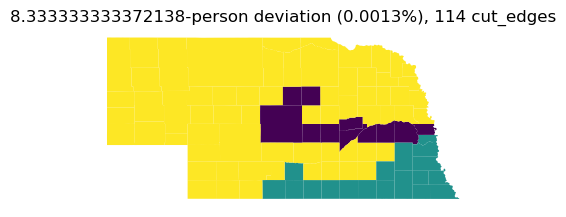

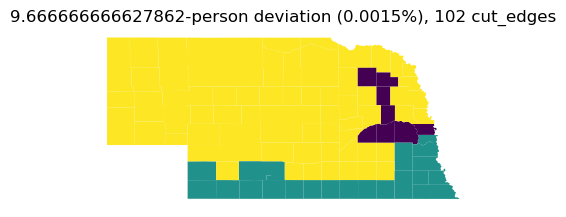

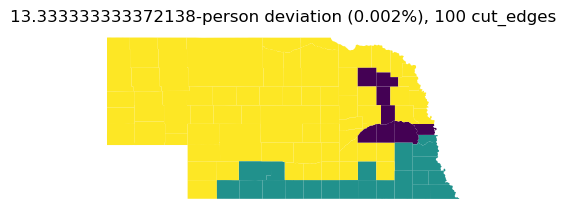

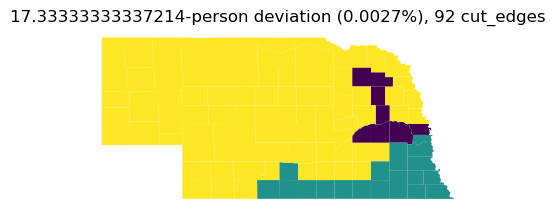

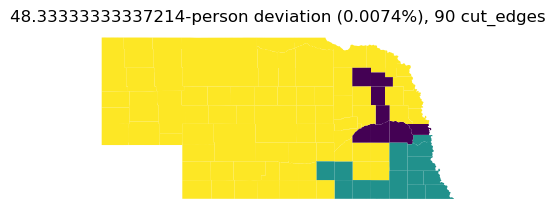

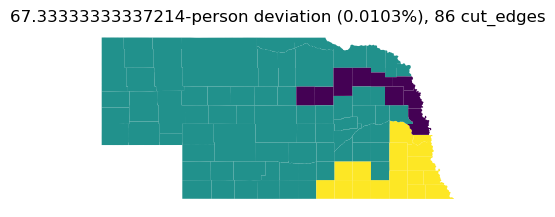

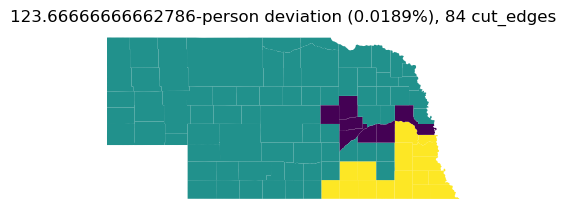

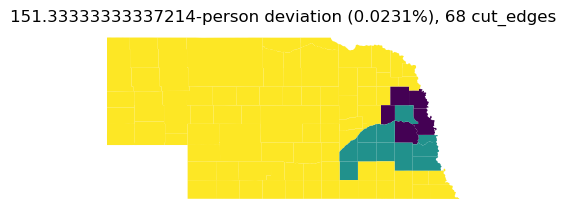

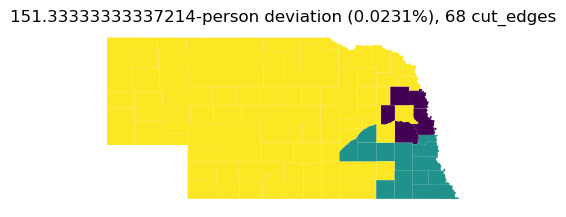

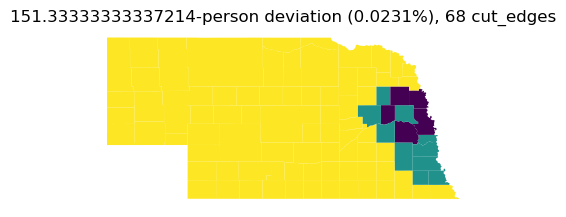

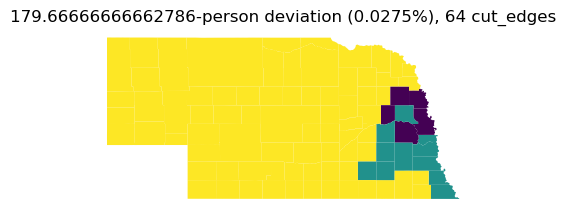

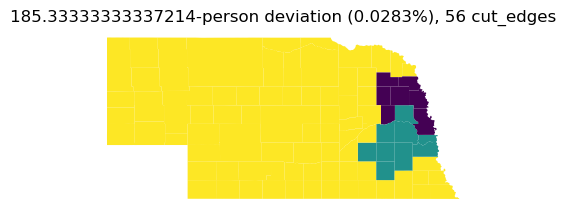

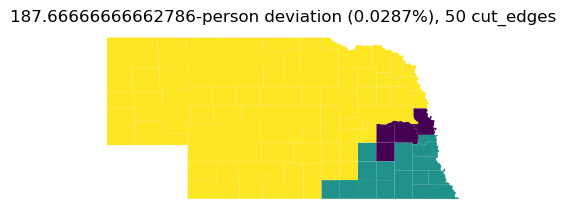

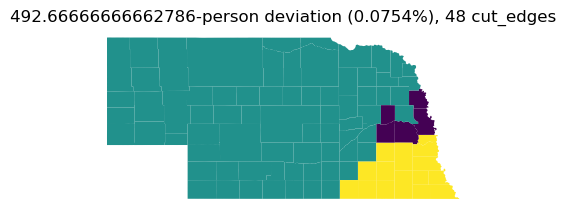

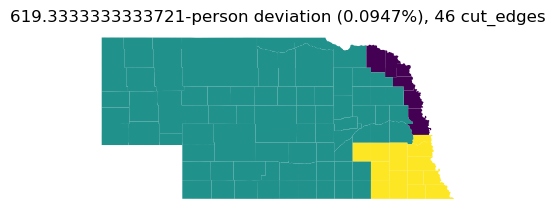

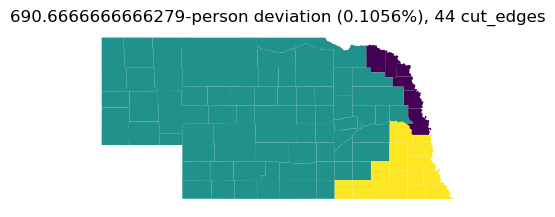

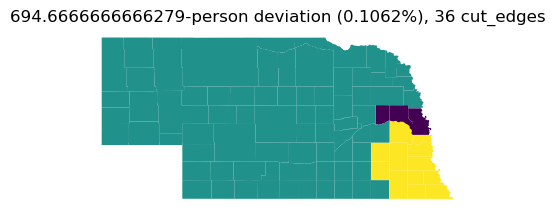

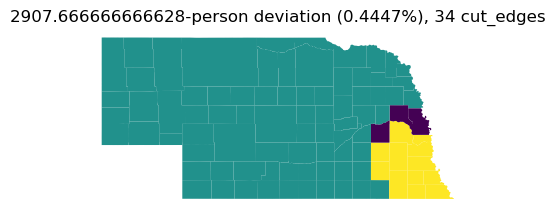

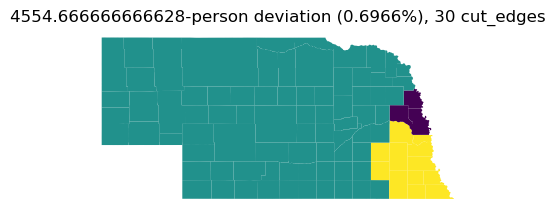

***************************************
obj_type = perimeter
***************************************
Pareto front objective values: [[0.6666666666278616, 70.59759037123146], [1.3333333333721384, 67.17503767577179], [3.3333333333721384, 66.57988001397017], [4.333333333372138, 58.153712268762085], [7.666666666627862, 54.02407083063716], [8.333333333372138, 53.55460984218628], [9.666666666627862, 49.08248702288597], [17.33333333337214, 45.89637576140086], [48.33333333337214, 44.22052413506476], [151.33333333337214, 41.12351905715386], [179.66666666662786, 40.399387538882344], [185.33333333337214, 38.27164198671651], [187.66666666662786, 35.082102603009716], [492.66666666662786, 35.05070269833865], [619.3333333333721, 34.648311014012634], [694.6666666666279, 32.20761304757021], [4554.666666666628, 31.122466493420703]]


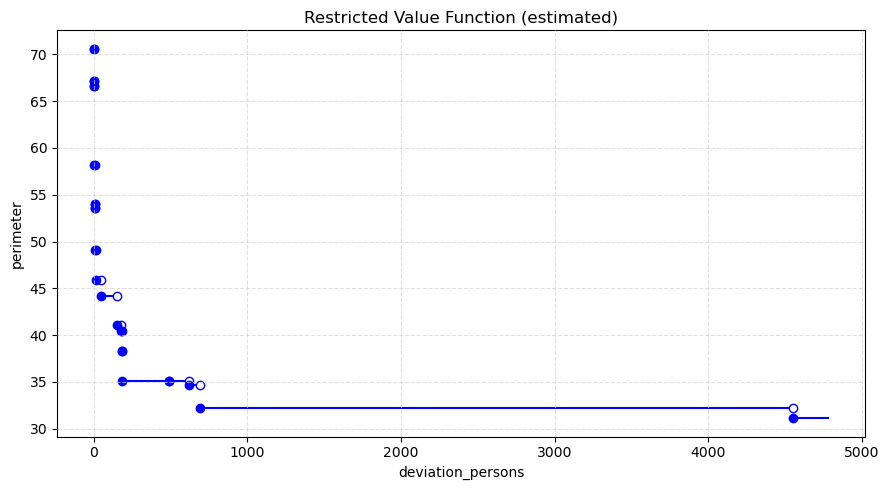

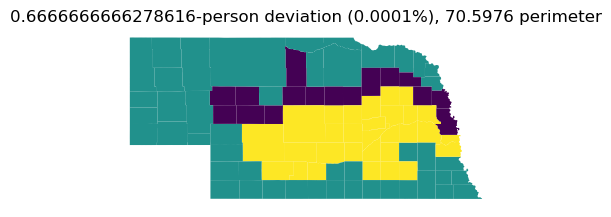

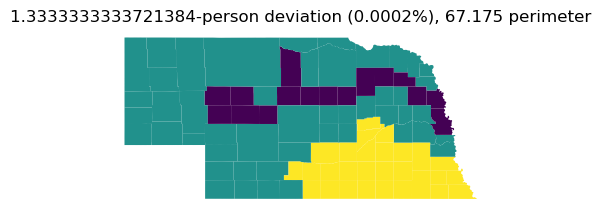

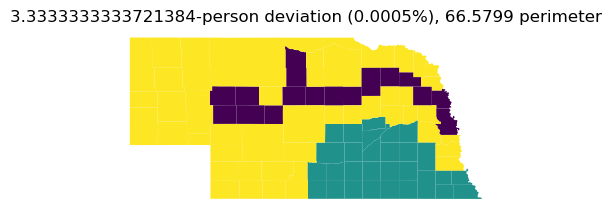

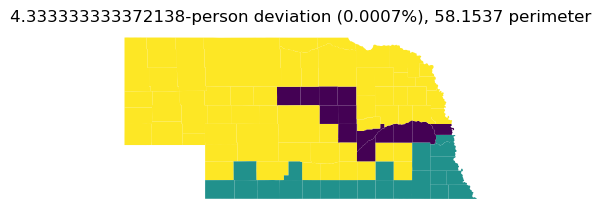

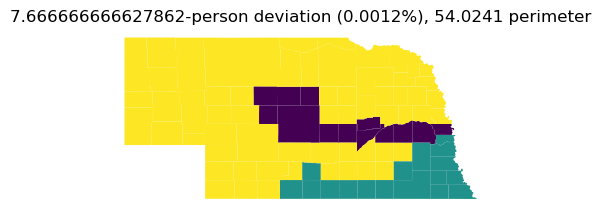

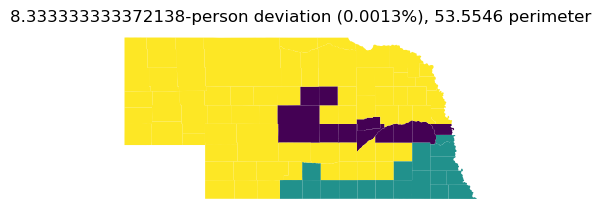

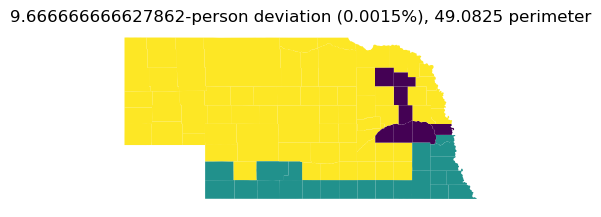

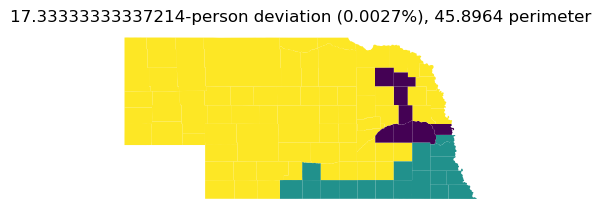

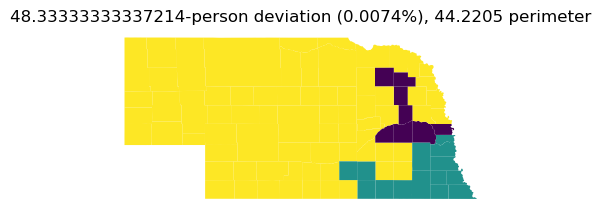

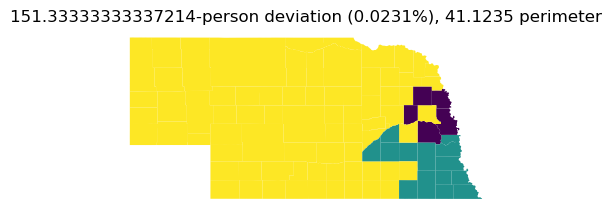

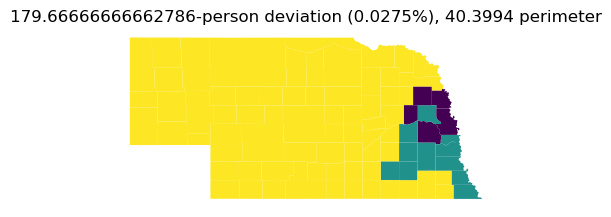

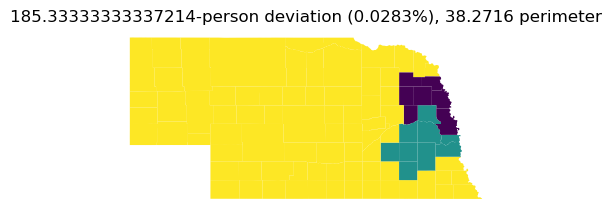

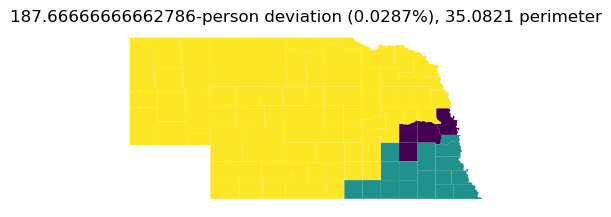

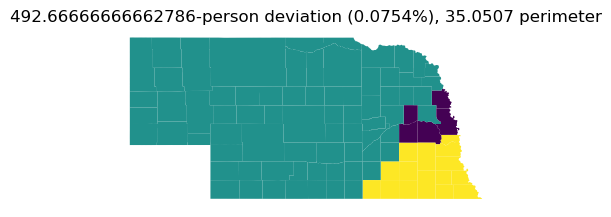

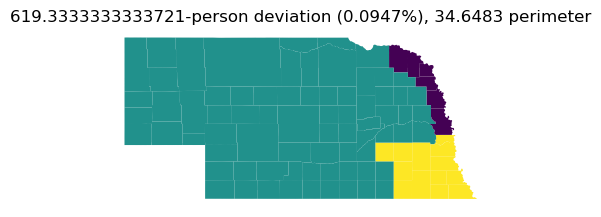

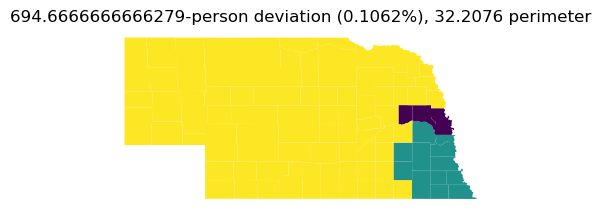

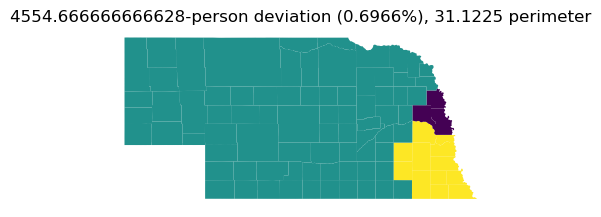

***************************************
obj_type = inverse_Polsby_Popper
***************************************
Pareto front objective values: [[0.6666666666278616, 7.257508165109222], [1.3333333333721384, 6.689464660885638], [3.3333333333721384, 6.610583969084746], [4.333333333372138, 5.551297799406068], [4.666666666627862, 5.476853309166185], [7.666666666627862, 4.585042818165654], [9.666666666627862, 4.526900378378146], [13.333333333372138, 4.519126206976658], [17.33333333337214, 4.082613464341137], [48.33333333337214, 3.856383816895395], [102.33333333337214, 3.8336093377546043], [151.33333333337214, 3.7550024801677075], [180.33333333337214, 3.484648565372865], [185.33333333337214, 3.001227395416669], [187.66666666662786, 2.7429513100531153], [694.6666666666279, 2.2460203006749206], [4458.333333333372, 2.135876762124304], [5007.666666666628, 2.134032927690814], [5373.666666666628, 2.1268084384926293]]


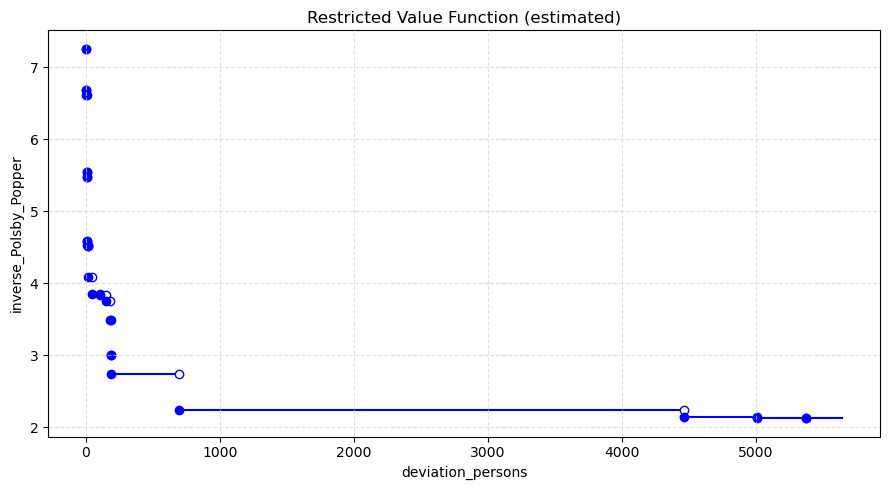

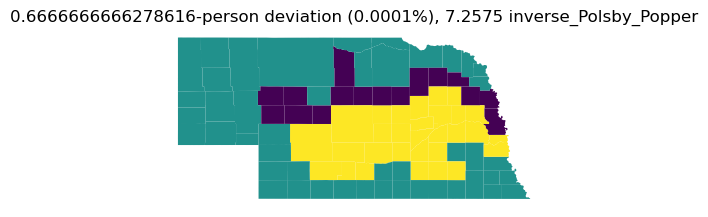

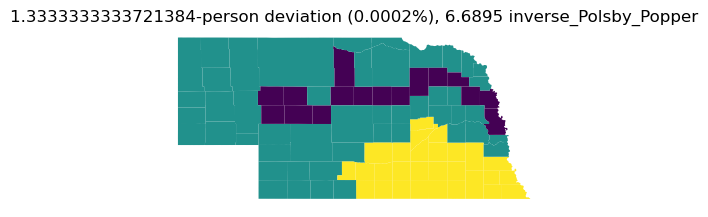

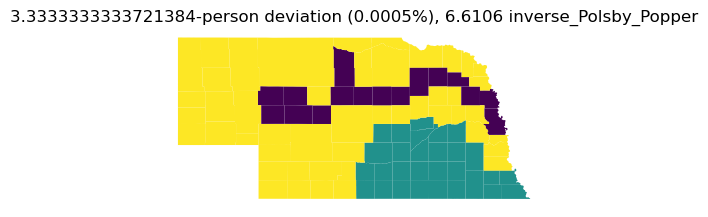

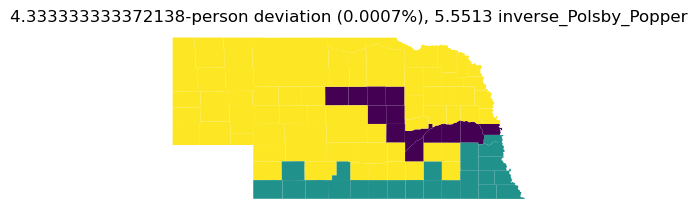

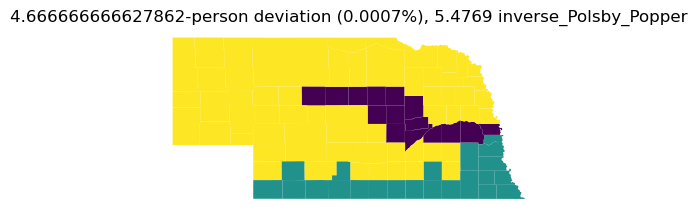

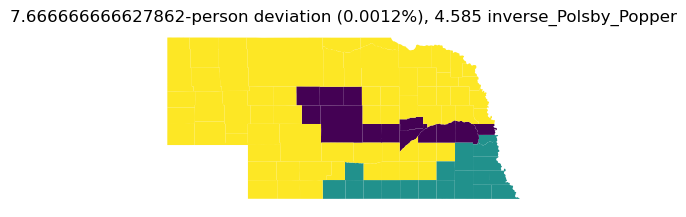

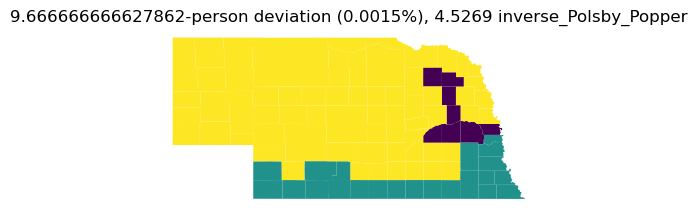

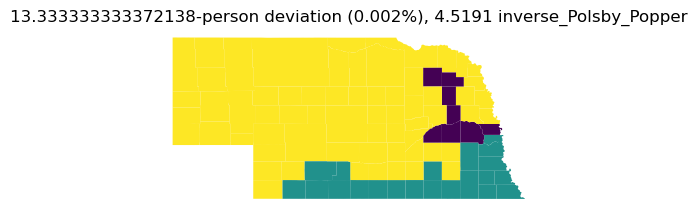

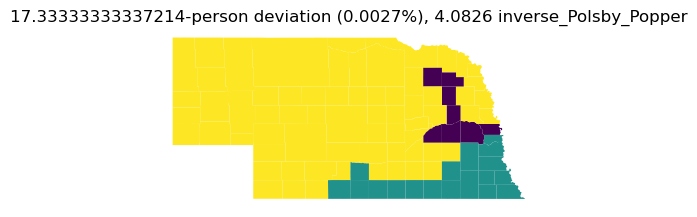

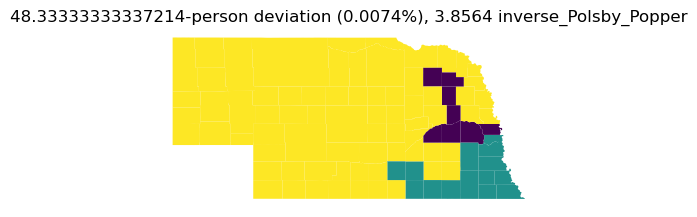

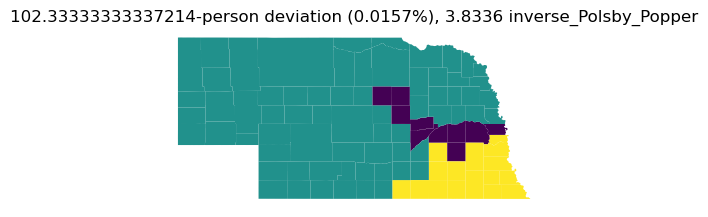

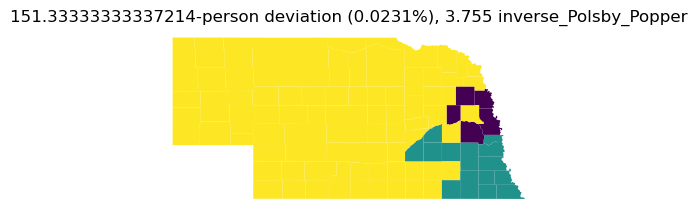

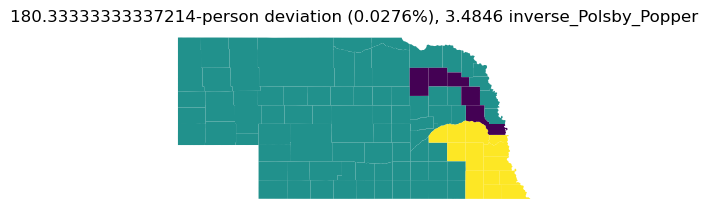

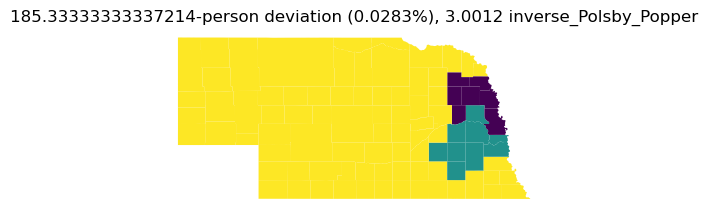

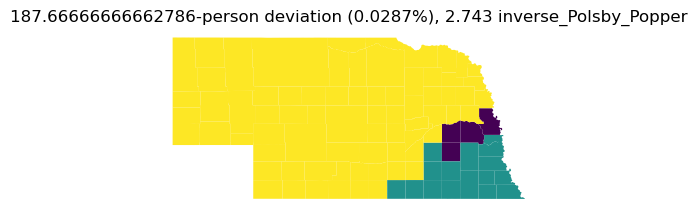

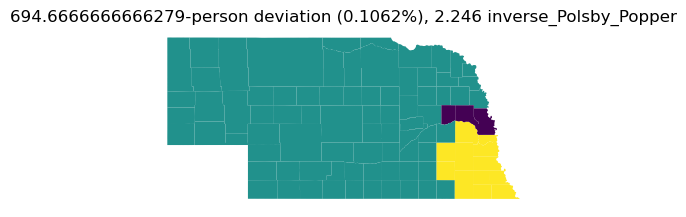

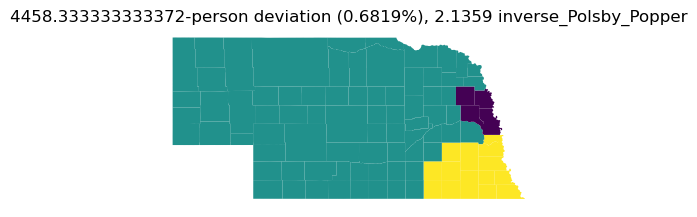

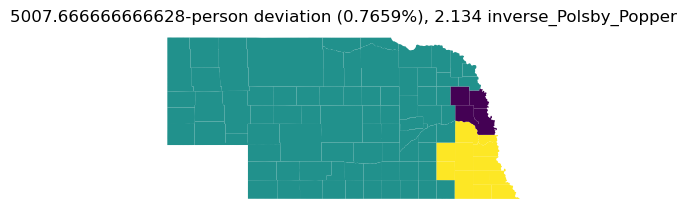

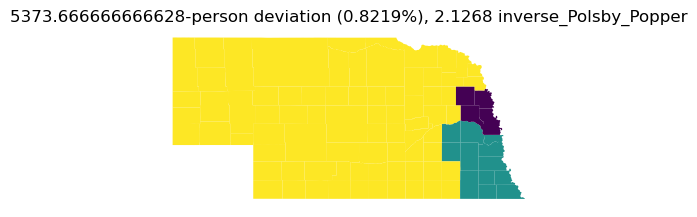

***************************************
obj_type = average_Polsby_Popper
***************************************
Pareto front objective values: [[0.6666666666278616, 0.18649948668248004], [1.3333333333721384, 0.20121501281554002], [3.3333333333721384, 0.2230990971010165], [9.666666666627862, 0.23160997311350853], [17.33333333337214, 0.24960388374125997], [22.33333333337214, 0.25492260291374086], [30.33333333337214, 0.2575825410583055], [39.66666666662786, 0.2664666634249309], [92.66666666662786, 0.30101620161291615], [180.33333333337214, 0.3200086917992082], [185.33333333337214, 0.3389053866856359], [187.66666666662786, 0.3844911834001417], [363.66666666662786, 0.402477687660096], [694.6666666666279, 0.4487026404616214], [765.3333333333721, 0.4487403007736606], [4458.333333333372, 0.4703966850154409], [5007.666666666628, 0.47144628325417764], [5223.666666666628, 0.4727212816464566], [5373.666666666628, 0.47313548064343003]]


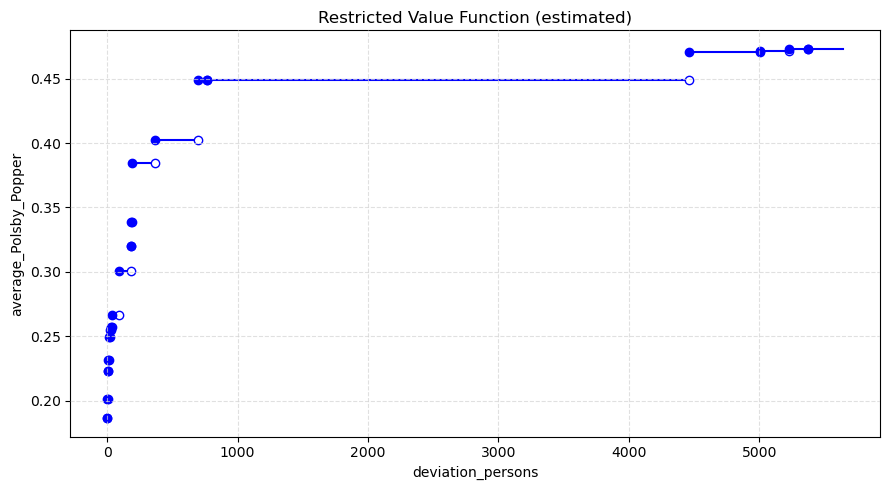

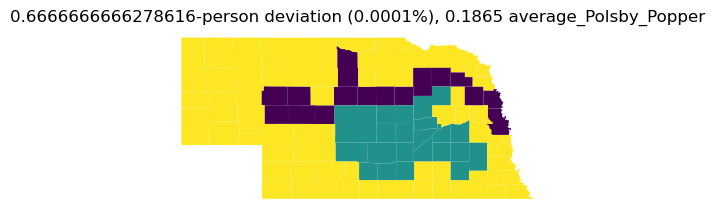

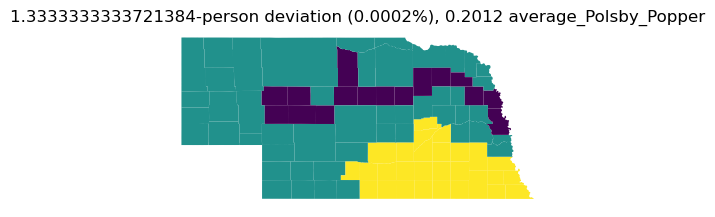

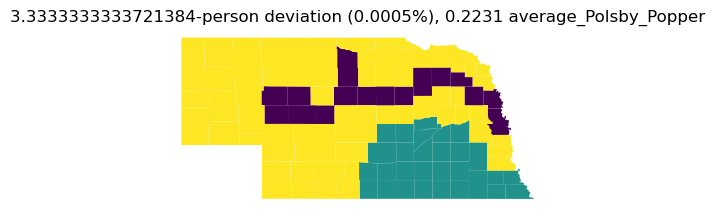

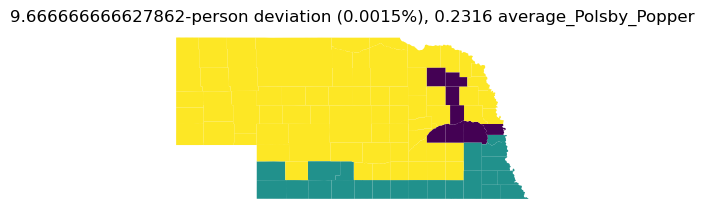

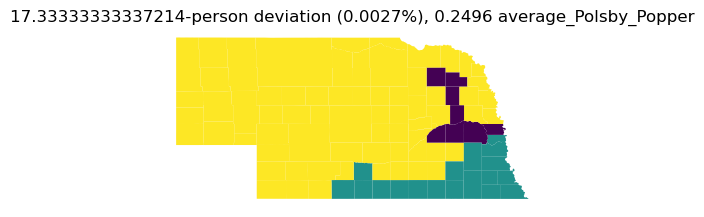

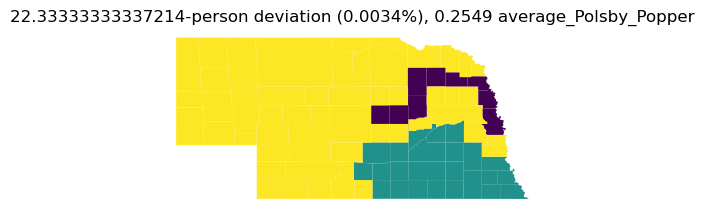

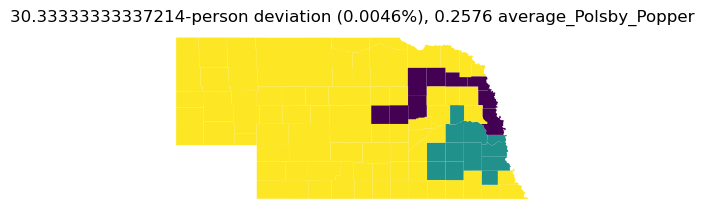

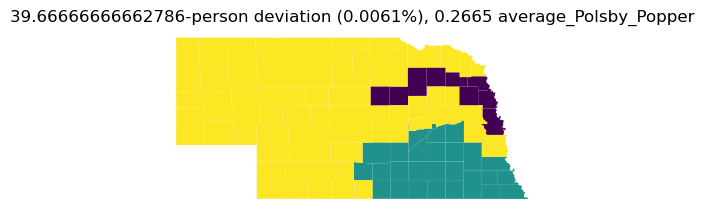

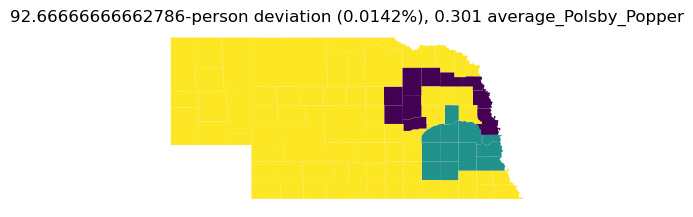

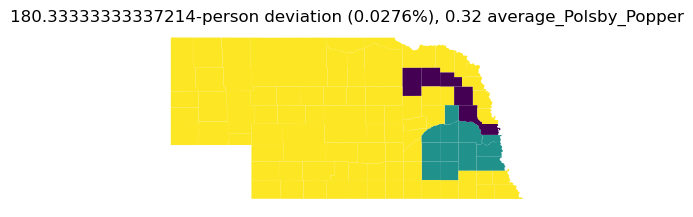

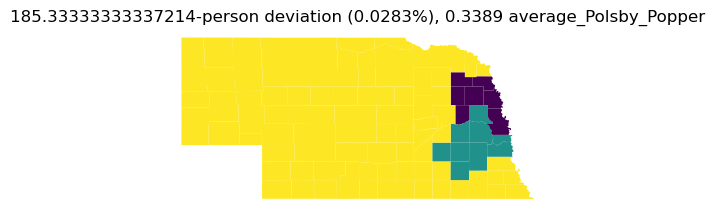

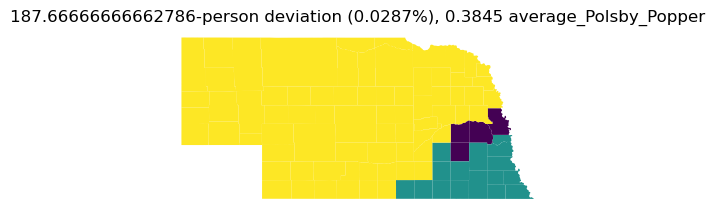

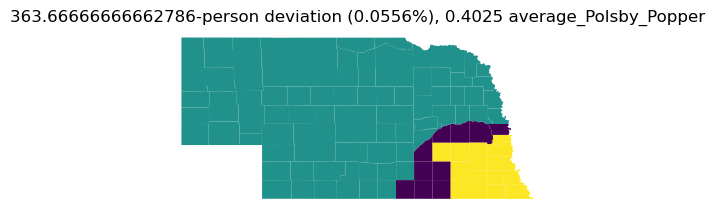

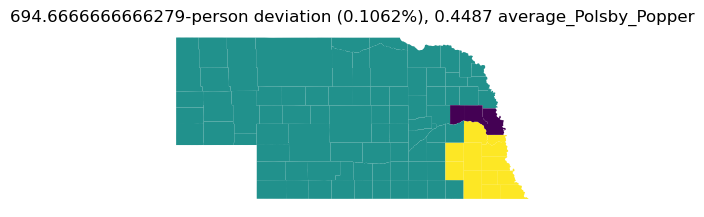

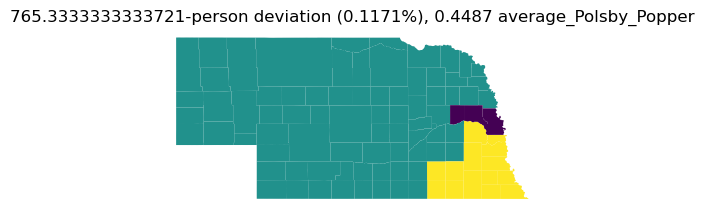

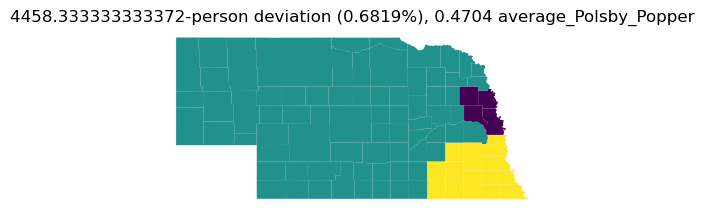

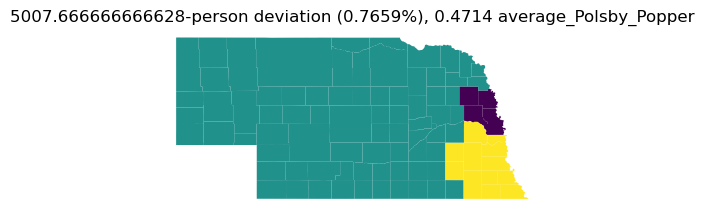

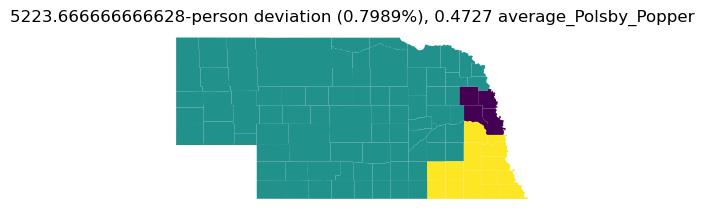

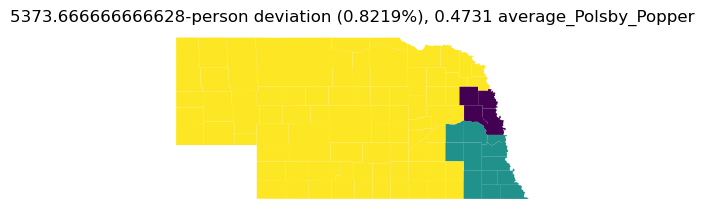

***************************************
obj_type = bottleneck_Polsby_Popper
***************************************
Pareto front objective values: [[0.6666666666278616, 0.11494547122161361], [0.6666666666278616, 0.11494547122161361], [3.6666666666278616, 0.11666435346849269], [4.333333333372138, 0.15331707627183588], [4.333333333372138, 0.15331707627183588], [7.666666666627862, 0.20537588201492413], [12.333333333372138, 0.21058860180123865], [16.33333333337214, 0.21374121912012406], [17.33333333337214, 0.2187689995563165], [36.33333333337214, 0.22542934021850905], [185.33333333337214, 0.28177536532729275], [185.33333333337214, 0.28177536532729275], [187.66666666662786, 0.3144675339648218], [694.6666666666279, 0.394716127210464], [694.6666666666279, 0.394716127210464], [1494.6666666666279, 0.4134210801259788], [4458.333333333372, 0.4263047595061874]]


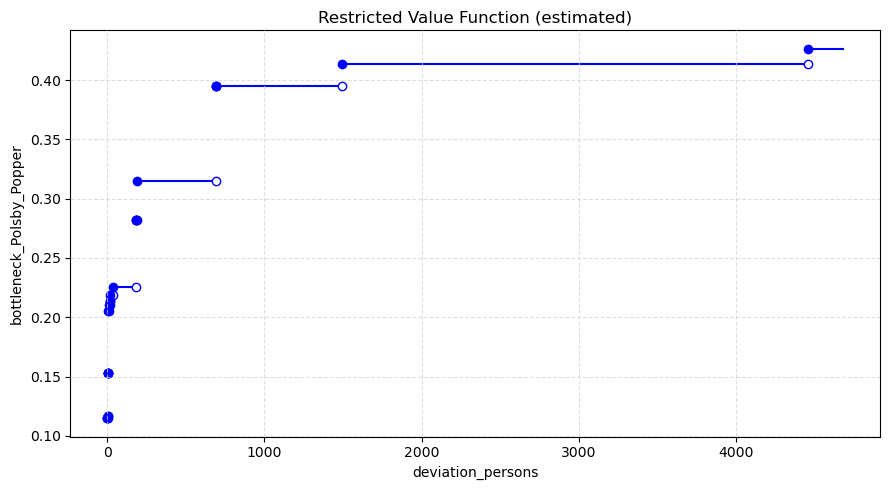

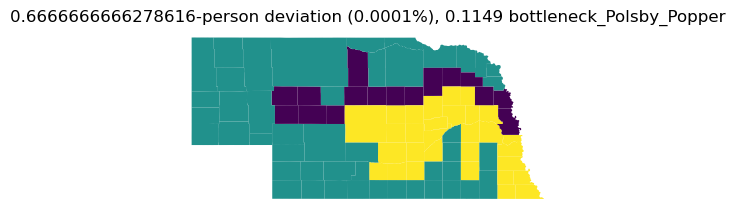

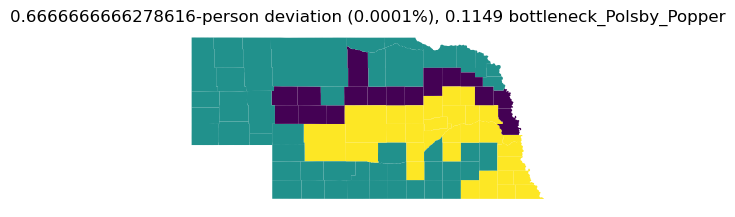

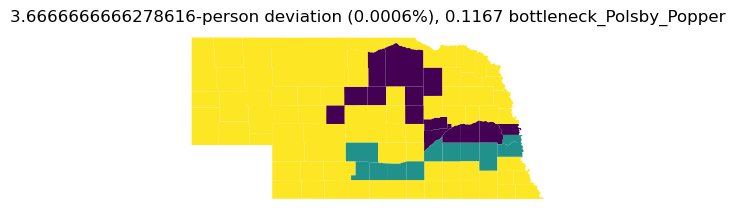

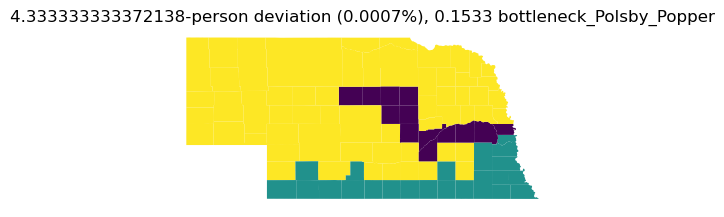

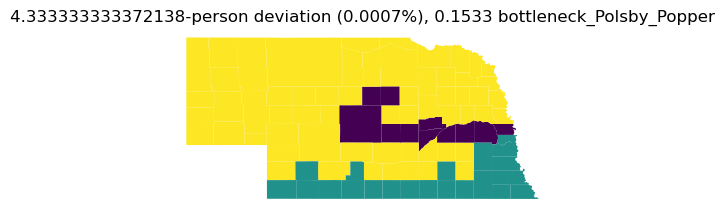

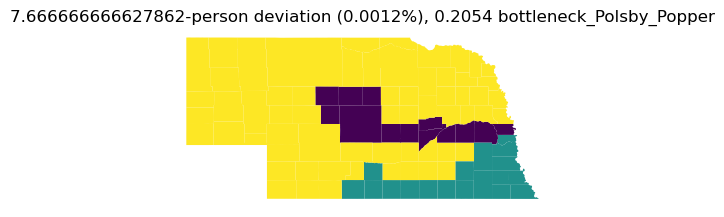

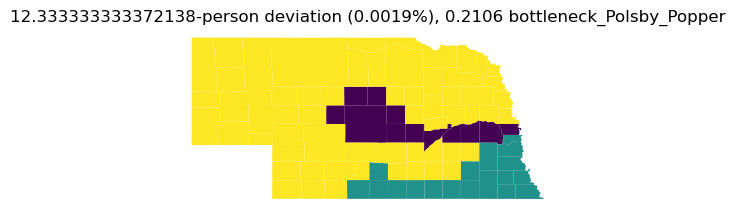

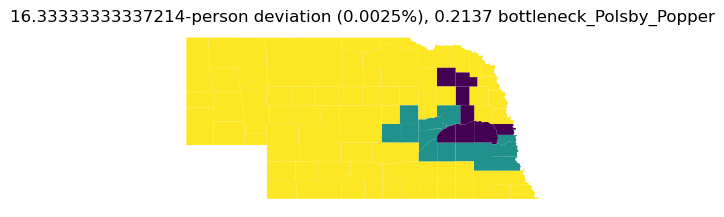

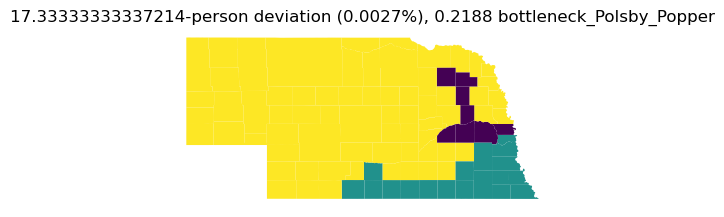

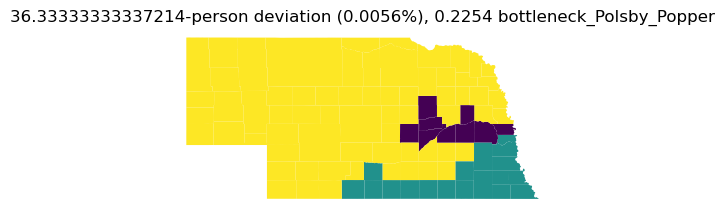

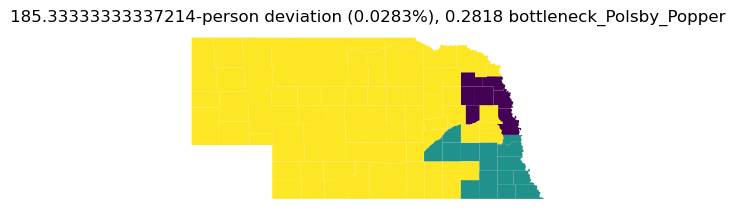

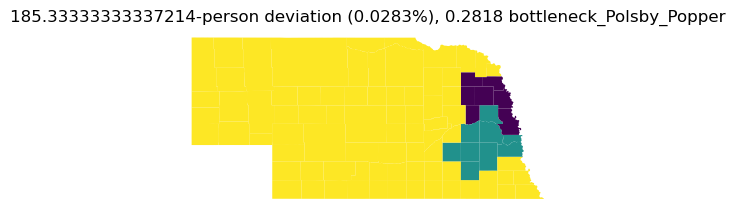

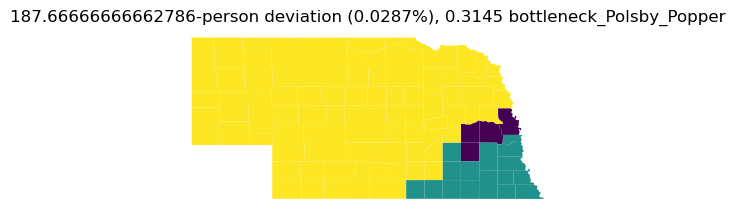

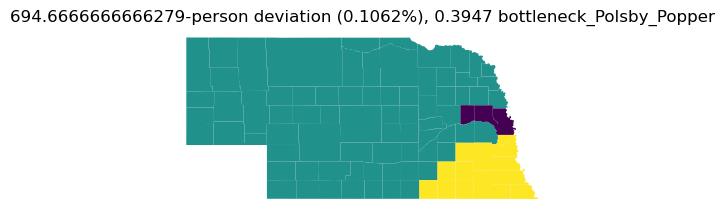

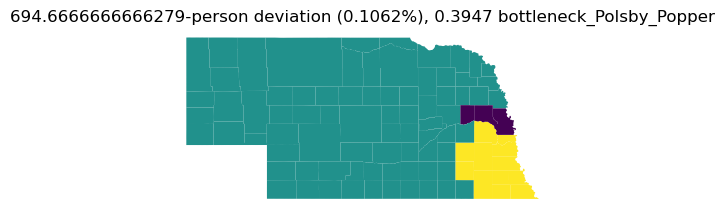

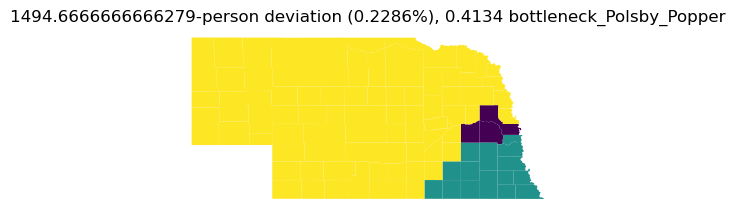

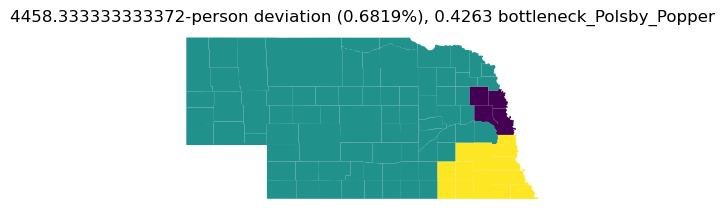

In [5]:
from pareto import ParetoFrontier
from metrics import *
from draw import draw_plan
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.shp'

# set dummy values... (because compute_obj checks plan feasibility...)
G._L = 0 
G._U = k * ideal_population
pareto = dict()

obj_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']

for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    
    senses = ['min', 'max' if obj_type in ['average_Polsby_Popper', 'bottleneck_Polsby_Popper'] else 'min']
    obj_names = ['deviation_persons', obj_type]
    pareto[obj_type] = ParetoFrontier(senses, obj_names, state=state, level='county')
    
    for plan in plans:  
        dev = observed_deviation_persons(G, plan, ideal_population)
        obj = compute_obj(G, plan, obj_type)
        objval = [dev, obj]      
        
        # Add the plan and its objective values to the Pareto frontier
        pareto[obj_type].add_plan(plan, objval)
                
    # Print the Pareto frontier plans and objective values
    #print("Pareto front plans:", pareto[obj_type].plans)
    print("Pareto front objective values:", pareto[obj_type].objvals)
    
    # Set the limits accordingly
    pareto[obj_type].plot()   

    # Draw the plans from Pareto frontier
    pareto[obj_type].draw_plans()

In [6]:
print("plans =",plans)

plans = [[[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [0, 5, 12, 15, 17, 21, 22, 23, 24, 25, 29, 32, 33, 34, 35, 39, 41, 42, 45, 47, 48, 51, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 64, 66, 67, 68, 73, 79, 80, 84, 85, 87, 88, 90], [1, 2, 4, 6, 7, 10, 13, 16, 18, 19, 20, 28, 30, 31, 36, 37, 40, 43, 44, 49, 50, 59, 65, 69, 70, 71, 72, 78, 81, 82, 86, 91]], [[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [0, 5, 6, 12, 15, 17, 21, 23, 24, 25, 28, 29, 32, 33, 34, 35, 41, 42, 45, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 62, 63, 64, 65, 66, 67, 68, 69, 73, 79, 80, 84, 85, 87, 90, 91], [1, 2, 4, 7, 10, 13, 16, 18, 19, 20, 22, 30, 31, 36, 37, 39, 40, 43, 44, 50, 59, 61, 70, 71, 72, 78, 81, 82, 86, 88]], [[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [1, 2, 4, 10, 13, 16, 18, 20, 21, 30, 31, 39, 40, 43, 44, 47, 49, 59, 70, 72, 78, 81, 82, 86], [0, 5, 6, 7, 12, 15, 17, 19, 22, 23, 24, 25, 28, 29, 32, 33, 34, 35, 36, 37, 41, 42, 45,

In [7]:
len(plans)

1389